In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [20]:
logistic = SGDClassifier(loss = 'log', penalty = 'l2', max_iter = 10000, tol = 1e-5, random_state = 10)
pca = PCA()
pipe = Pipeline(steps = [('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
Y_digits = digits.target

In [21]:
np.logspace(-4, 4, 5)

array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])

In [22]:
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5)
}

search = GridSearchCV(pipe, param_grid, iid = False, cv = 5, return_train_score = False)
search.fit(X_digits, Y_digits)
print('Best parameter (CV score = %0.3f):' % search.best_score_)
print(search.best_params_)

Best parameter (CV score = 0.919):
{'logistic__alpha': 1.0, 'pca__n_components': 50}


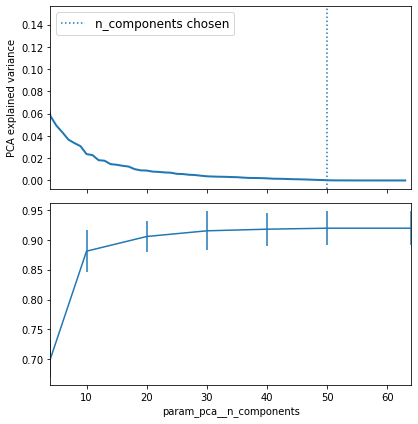

In [25]:
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows = 2, sharex = True, figsize = (6,6))
ax0.plot(pca.explained_variance_ratio_, linewidth = 2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle = ':', label = 'n_components chosen')
ax0.legend(prop=dict(size=12))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g : g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x = components_col, y = 'mean_test_score', yerr = 'std_test_score', legend=False, ax = ax1)
plt.tight_layout()
plt.show()